# t-sne 觀察 : 分群

# [教學目標]
- 觀察雙同心圓使用 t-SNE 在不同困惑度 (perplexity) 下的分群效果  
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 使用同心圓的資料, 觀察 t-sne 在不同困惑度 (perplexity) 下, 分群的效果如何變化 (In[4], Out[4])

In [1]:
# 載入套件
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.colors import ListedColormap
from sklearn import datasets, manifold

In [2]:
# 設定同心圓資料點 
X, y = datasets.make_circles(n_samples=300, factor=.5, noise=.05)

In [3]:
def plot_circles(X, y):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6,))
    for i, perplexity in enumerate([-1, 4, 6, 9, 14, 21, 30, 45, 66, 100]):
        plot_circle(X, y, perplexity, axes[i // 5][i % 5])
    plt.show()

def plot_circle(X, y, perplexity, ax):
    X = make_tsne_decompistion(X, perplexity)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'green']))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.set_title('perplexity = {}'.format(perplexity) if perplexity > 0 else 'original')

def make_tsne_decompistion(X, perplexity):
    if perplexity > 0:
        start_time = time.time()
        X_tsne = manifold.TSNE(n_components=2, init='random', perplexity=perplexity, random_state=0).fit_transform(X)
        print('t-SNE decomposition with perplexity {} in {:.2f} sec.'.format(perplexity, time.time() - start_time))
        return X_tsne
    return X

t-SNE decomposition with perplexity 4 in 1.07 sec.
t-SNE decomposition with perplexity 6 in 1.01 sec.
t-SNE decomposition with perplexity 9 in 1.04 sec.
t-SNE decomposition with perplexity 14 in 1.21 sec.
t-SNE decomposition with perplexity 21 in 1.30 sec.
t-SNE decomposition with perplexity 30 in 1.50 sec.
t-SNE decomposition with perplexity 45 in 1.73 sec.
t-SNE decomposition with perplexity 66 in 1.99 sec.
t-SNE decomposition with perplexity 100 in 2.21 sec.


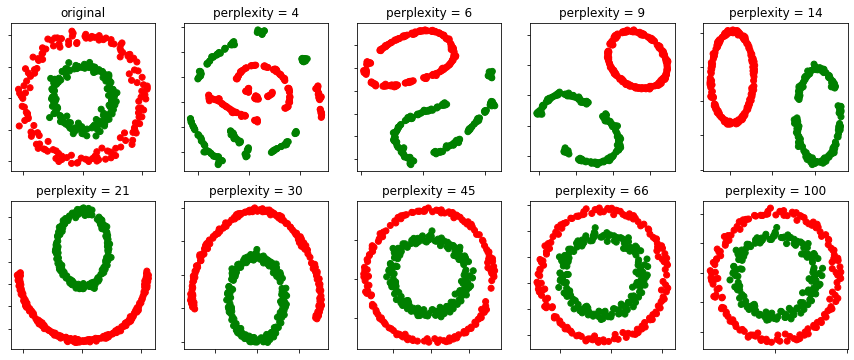

In [4]:
plot_circles(X, y)

# 觀察結果
* perplexity 越低時, 圖形越零散, 越高時不僅分群好, 也讓圖形更接近原圖
* 但 perplexity 越高, 執行時間也越久